In [1]:
import numpy as np
import matplotlib.pyplot as plt
import json
import glob
import os

## This section plots the cross validation errors of each structure
Firstly the errors are read in from the sub directories into a dictionary, converting the error to a float. These are read into a dictionary for each potential used, and the fit error for each structure, for that potential, are plotted against the error.

In [2]:
def directory_path(head_directory_name, structure_number):
    directory = os.path.join(head_directory_name, 'p{}'.format(structure_number))
    return directory

In [3]:
head_directory_name = 'cross_validation'
number_of_structures = 15

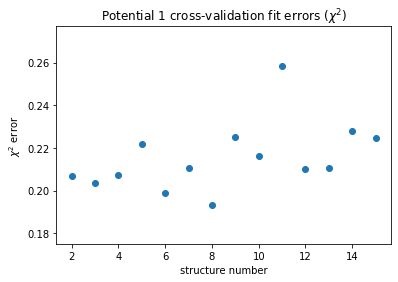

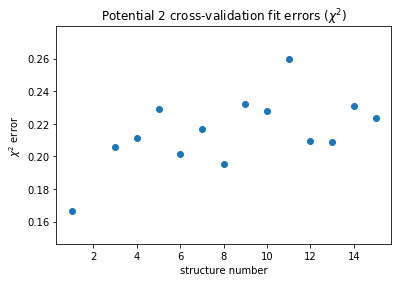

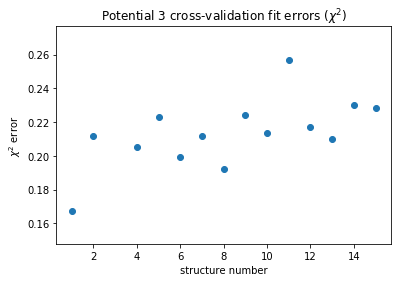

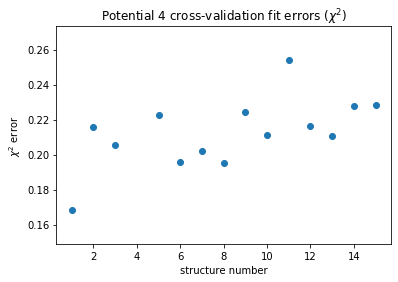

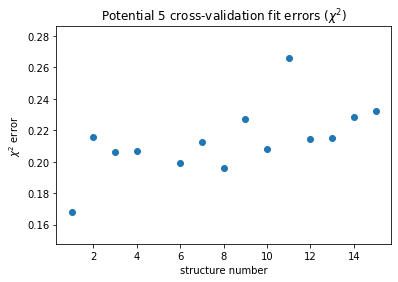

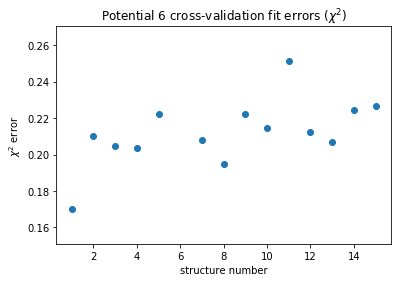

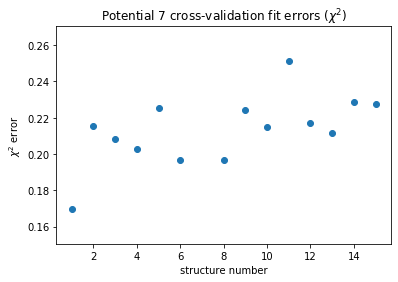

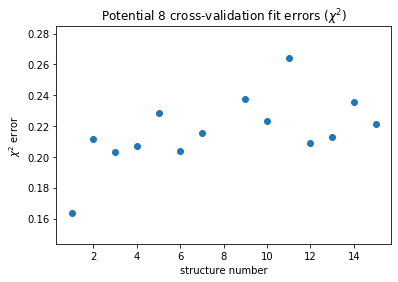

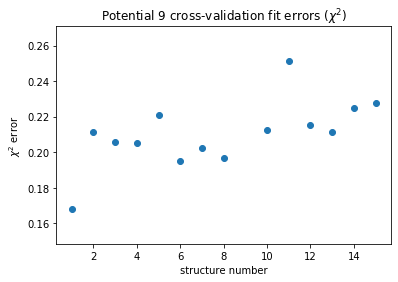

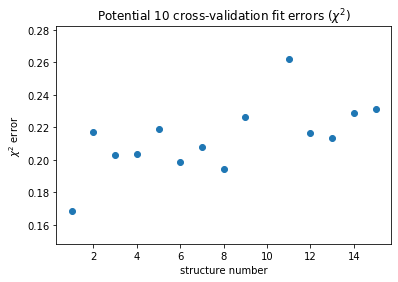

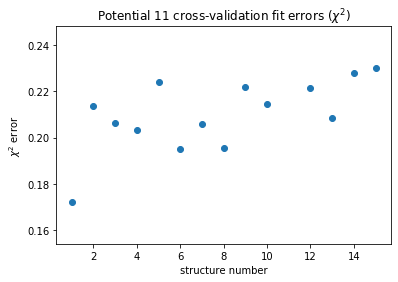

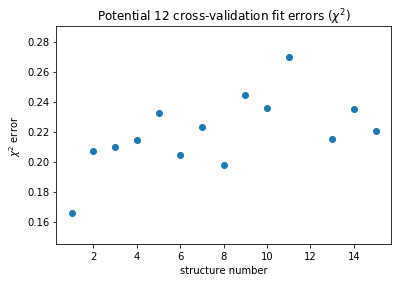

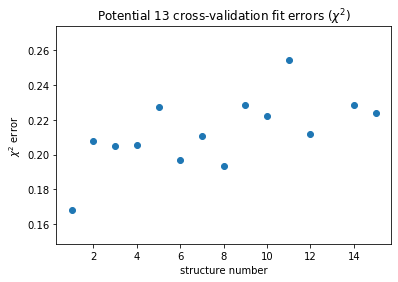

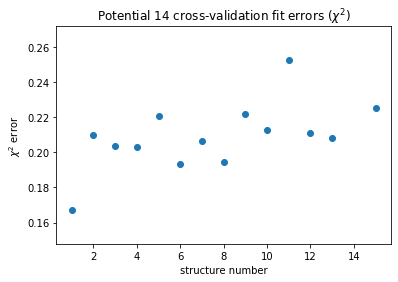

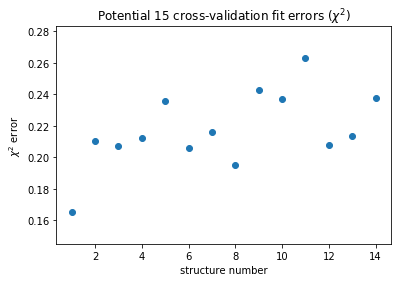

In [4]:
for potential_number in range(number_of_structures):
    error_dict = {}
    directory = directory_path(head_directory_name, potential_number+1)
    for error_file in sorted(glob.glob('{}/*error.dat'.format(directory))):
        fit_struct_num = error_file.replace(directory, '').replace('/p{}-s'.format(potential_number+1),'').replace('_error.dat', '')
        error = float(np.loadtxt(error_file))
        error_dict.update( {int(fit_struct_num):error}) #Remove int if directory naming system changes to include strings. This will change the order of the structures though.
    plt.scatter(*zip(*sorted(error_dict.items())))
    plt.xlabel('structure number')
    plt.ylabel('$\chi^2$ error')
    plt.title('Potential {} cross-validation fit errors ($\chi^2$)'.format(potential_number+1))
    plt.savefig('{}/p{}_cv_fit_errors.png'.format(head_directory_name,potential_number+1),dpi=500, bbox_inches = "tight")
    plt.show()